In [2]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats
import env

### Question 1: 
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a **Poisson distribution** with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

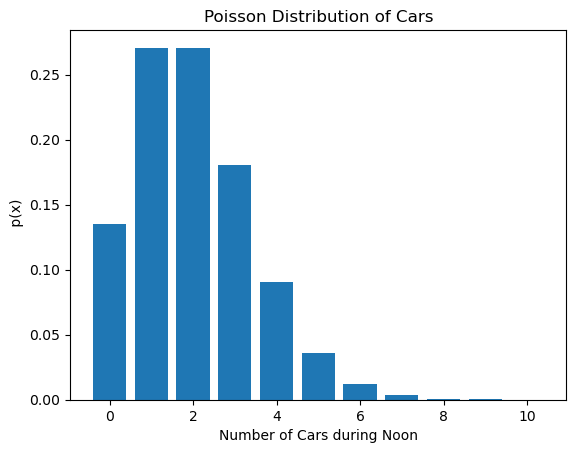

In [34]:
# the mean number of cars:
mean_cars = 2

# create the range for the graph
x = np.arange(0,11)

# probability a value is equal to a point. Discrete Data: cars cannot be broken in parts.
# poisson distrubition: .poisson: A poisson discrete random variable.
y  = stats.poisson(mean_cars).pmf(x)

# create the bar chart:
plt.bar(x, y)
plt.xlabel('Number of Cars during Noon')
plt.ylabel(' p(x)')
plt.title('Poisson Distribution of Cars')
plt.show()

In [32]:
# a. What is the probability that no cars drive up in the noon hour?

# Experimental Probability
# np.random: will give random variables
# poisson(discrete_number, range) == set_value (will give boolean list)
#.mean() will get the mean of the True(when the variable is eqaul to 0)
(np.random.poisson(mean_cars, 10_000) == 0).mean()

0.1333

In [31]:
# Theoretical Probability
# .poisson(distinct_variable).pmf(requested_variable: no cars)
stats.poisson(mean_cars).pmf(0)

0.1353352832366127

In [35]:
# b. What is the probability that 3 or more cars come through the drive through?

#Experimental Probability
(np.random.poisson(mean_cars, 10_000) >= 3).mean()

0.3275

In [36]:
# Theoretical Probability
# probabilty a value is greater than a point = .sf (have the value, want the probability)
# .poisson(distinct_varibale).sf(value. more than 2)
stats.poisson(mean_cars).sf(2)

0.32332358381693654

In [43]:
# c. How likely is it that the drive through gets at least 1 car?

#Experimental Probability
(np.random.poisson(mean_cars, 10_000) >= 1).mean()

0.862

In [42]:
# Theoretical Probability
# probabilty a value is less than or equal to a point: .sf (have the value, want the probability)
stats.poisson(mean_cars).sf(0)

0.8646647167633873

In [45]:
#another method: 
1 - stats.poisson(mean_cars).pmf(0)

0.8646647167633873

### Question 2:
Grades of State University graduates are **normally distributed** with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [48]:
mean_grade = 3.0
std_grade = 0.3

#normaly distrubuted: .norm(mean, standard deviation)

grade = stats.norm(mean_grade, std_grade)
grade

In [55]:
# a. What grade point average is required to be in the top 5% of the graduating class?

# probability a value is less than or equal to a point
# .ppf: have the probability and want the value

grade.isf(.05)

3.4934560880854417

In [59]:
# opposite method
grade.ppf(0.95)

3.4934560880854417

In [56]:
# b. What GPA constitutes the bottom 15% of the class?

grade.ppf(.15)

2.689069983151863

In [61]:
# opposite method
grade.isf(.85)

2.689069983151863

In [64]:
# c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

# 1st declie: 0-10 percentile
# 2nd decile: 10-20 percentile
# 3rd decile: 20-30 percentile

range_of_gpa = grade.ppf([.2, .3])
range_of_gpa

(range_of_gpa[0] < 2.8) and (range_of_gpa[1] > 2.8)

True

In [69]:
# d. If I have a GPA of 3.5, what percentile am I in?

grade.sf(3.5)
print(f'You are in the {(grade.cdf(3.5).round(2)*100)}th percentile.')

You are in the 95.0th percentile.


### Question 3: 
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

Binomial: .binom(k- 1, n, p)
- k = number of successes
- n = total number of trials or observations
- p = the probability of sucess in a single trial

In [73]:
# parameters:

k = 97
n = 4_326
p = 0.02

# need to use the binomial probability formula
stats.binom(n, p).sf(k-1)



0.13975823631416448

### Question 4:
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.